## Chapter 10, Example 3a (Undercomplete)

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
seed = 10
torch.manual_seed(seed)
np.random.seed(seed)

# Create a figures directory if it doesn't exist
if not os.path.isdir('figures'):
    os.makedirs('figures')

# Parameters
n_hidden = 100
batch_size = 128
n_epochs = 50
learning_rate = 0.1

In [3]:
# MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 121023922.72it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 120055197.05it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37667638.31it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14132439.74it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Defining the Autoencoder Class

In the code provided, we are defining a simple autoencoder using PyTorch. Here's a breakdown of its structure and functionality:

### Class Initialization

- The `Autoencoder` class inherits from `nn.Module`, which is a standard practice when defining any neural network model in PyTorch.

- Within the `__init__` method, we define the architecture of our autoencoder. It consists of two main parts: the encoder and the decoder.

    - `self.encoder`: This is a linear layer that reduces the dimensionality of the input data, compressing it into a lower-dimensional space. The layer's size is defined by `n_input` (the size of the input data) and `n_hidden` (the size of the compressed representation).
    
    - `self.decoder`: Another linear layer that reconstructs the original data from its compressed form. The layer's size is the reverse of the encoder, defined by `n_hidden` and `n_input`, respectively.

- The weights of the neural network are initialized following a specific strategy:

    - For the encoder, we initialize the weights with a normal distribution with a mean of `0.0` and a standard deviation of `1 / np.sqrt(n_input)`. This specific choice helps in stabilizing the learning process by controlling the variance of the weights.
    
    - For the decoder, we are using a technique called "tied weights," where the decoder's weights are the transpose of the encoder's weights (`self.encoder.weight.data.T`). This not only reduces the number of parameters in the model but also imposes a form of regularization.

### Forward Pass

- The `forward` method defines the sequence of operations the model performs to generate an output from an input.

    - The input data `x` is first passed through the encoder, compressed, and then the sigmoid activation function is applied. The sigmoid function ensures the output is in the range (0, 1), making the model's behavior more predictable and the learning process more stable.
    
    - The compressed data is then passed through the decoder, attempting to reconstruct the original input. Again, the sigmoid activation function is applied to the output.

- The final output is the activation and the reconstructed data.

### Model Instantiation

- Finally, we create an instance of the `Autoencoder` class with `28*28` input size (typical for MNIST images, which are 28x28 pixels) and `n_hidden` representing the size of our hidden (compressed) layer. This instance `model` is what we will train and use for encoding/decoding tasks.


In [4]:
# Model
class Autoencoder(nn.Module):
    def __init__(self, n_input, n_hidden):
        super(Autoencoder, self).__init__()
        # Linear function
        self.encoder = nn.Linear(n_input, n_hidden)
        self.decoder = nn.Linear(n_hidden, n_input)

        # Weight initialization
        self.encoder.weight.data.normal_(0.0, 1 / np.sqrt(n_input))
        self.decoder.weight.data = self.encoder.weight.data.T  # tied weights

    def forward(self, x):
        h = torch.sigmoid(self.encoder(x))
        x = torch.sigmoid(self.decoder(h))
        return h,x

model = Autoencoder(28*28, n_hidden)

In [5]:
def loss_function(y, original):

    # Calculate the mean squared error (MSE) loss
    mse_loss = torch.mean(torch.sum((original - y) ** 2, dim=1))

    return mse_loss

In [6]:
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training
loss_values = []
for epoch in range(n_epochs):
    model.train()
    train_losses = []
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)  # flatten

        # Forward pass
        activation, output = model(img)
        loss = loss_function(output, img)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
    avg_loss = np.mean(train_losses)
    loss_values.append(avg_loss)
    print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/50], Loss: 30.3923
Epoch [2/50], Loss: 18.8955
Epoch [3/50], Loss: 16.0675
Epoch [4/50], Loss: 14.5250
Epoch [5/50], Loss: 13.5127
Epoch [6/50], Loss: 12.7862
Epoch [7/50], Loss: 12.2243
Epoch [8/50], Loss: 11.7672
Epoch [9/50], Loss: 11.3810
Epoch [10/50], Loss: 11.0447
Epoch [11/50], Loss: 10.7430
Epoch [12/50], Loss: 10.4702
Epoch [13/50], Loss: 10.2201
Epoch [14/50], Loss: 9.9896
Epoch [15/50], Loss: 9.7763
Epoch [16/50], Loss: 9.5804
Epoch [17/50], Loss: 9.4004
Epoch [18/50], Loss: 9.2360
Epoch [19/50], Loss: 9.0849
Epoch [20/50], Loss: 8.9472
Epoch [21/50], Loss: 8.8210
Epoch [22/50], Loss: 8.7056
Epoch [23/50], Loss: 8.6010
Epoch [24/50], Loss: 8.5049
Epoch [25/50], Loss: 8.4171
Epoch [26/50], Loss: 8.3360
Epoch [27/50], Loss: 8.2612
Epoch [28/50], Loss: 8.1924
Epoch [29/50], Loss: 8.1288
Epoch [30/50], Loss: 8.0690
Epoch [31/50], Loss: 8.0139
Epoch [32/50], Loss: 7.9625
Epoch [33/50], Loss: 7.9146
Epoch [34/50], Loss: 7.8698
Epoch [35/50], Loss: 7.8268
Epoch [36/50], L

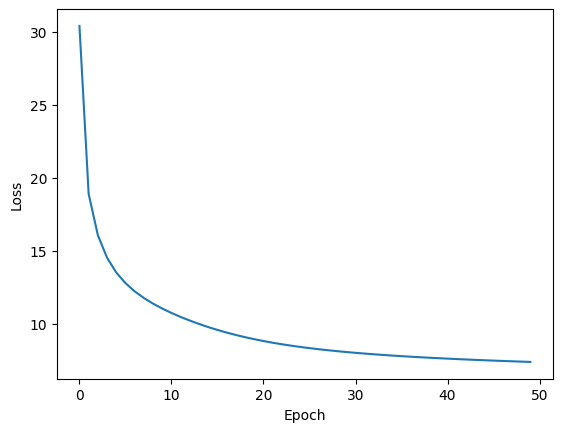

In [7]:
# Plotting the training loss
plt.figure()
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('./figures/10.3a_1.png')

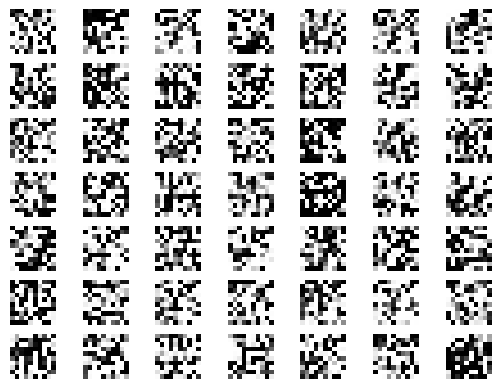

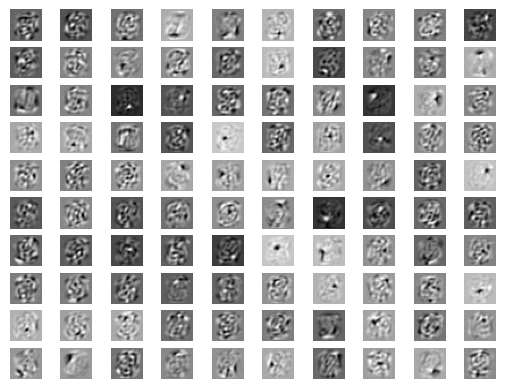

In [8]:
# Visualization
def visualize_output(images, epoch):
    # Plot original images, noisy images, and the reconstructions from the autoencoder
    model.eval()
    with torch.no_grad():
        images_flat = images.view(images.size(0), -1)
        activations, outputs = model(images_flat)
        outputs.clamp_(0, 1)  # Values might be outside [0, 1] range, clamp to ensure valid pixel range
        outputs = outputs.view(outputs.size(0), 1, 28, 28)

        # Create a grid of images including original and reconstructed images
        images = images.cpu()
        outputs = outputs.cpu()

        # Display original images
        for i in range(49):
            plt.subplot(7, 7, i+1)
            plt.imshow(images[i][0], cmap='gray')
            plt.axis('off')
        plt.savefig(f'./figures/10.3a_3.png')

        # Display reconstructed images
        for i in range(49):
            plt.subplot(7, 7, i+1)
            plt.imshow(outputs[i][0], cmap='gray')
            plt.axis('off')
        plt.savefig(f'./figures/10.3a_4.png')

        # Display hidden activations
        for i, activation in enumerate(activations[:49]):
            plt.subplot(7, 7, i+1)

            # Here, each activation is a vector. We can reshape it as a sqrt(n_hidden) x sqrt(n_hidden) image
            # if n_hidden is a perfect square. Otherwise, we could just display it as a linear array.
            act_image = activation.reshape(int(np.sqrt(n_hidden)), int(np.sqrt(n_hidden)))
            plt.imshow(act_image.cpu(), cmap='gray', interpolation='none')
            plt.axis('off')
        plt.savefig('./figures/10.3a_5.png')

# Testing with the test dataset
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=10000, shuffle=False)
test_images, _ = next(iter(test_loader))
visualize_output(test_images, n_epochs)

# Weights visualization
weights = model.encoder.weight.data.view(n_hidden, 28, 28).cpu()
plt.figure()
for i in range(100):  # displaying 100 weights
    plt.subplot(10, 10, i+1)
    plt.imshow(weights[i], cmap="gray")
    plt.axis('off')
plt.savefig('./figures/10.3a_2.png')
